<a href="https://colab.research.google.com/github/camilopinoh/yolov8/blob/main/detector_marcas_yolov8_roboflow_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:

Camilo Pino Huerta

Felipe Di Vanni Valenzuela

# Requisitos:



*   Ejecutar en google colab
*   Entorno de ejecucion GPU (T4)




In [1]:
!nvidia-smi

Sat Dec  2 19:26:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Preparacion Dataset desde roboflow

DATASET IMAGENES RECOPILADAS

https://universe.roboflow.com/data6000/brand-logo-recognition-object-detection/dataset/4#

DATASET GENERADO Y USADO

https://universe.roboflow.com/machine-learning-saucs/brandsdetection

GITHUB YOLO

https://github.com/ultralytics/ultralytics

Para poder ocupar el dataset se ocupo la plataforma "roboflow" en la cual se subio el dataset de imagenes con 5 marcas las cuales son:

*   McDonalds
*   Coca-Cola
*   Pepsi
*   Heineken
*   Starbucks

El dataset esta construido con alrededor de 450 imagenes con sus labels ya elaborados

Primero se deben de subir las imagenes con sus labels en la plataforma

<a href="https://ibb.co/X5cmzrK"><img src="https://i.ibb.co/jwn7LPQ/generateupload.jpg" alt="generateupload" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

Se empieza el proceso para generar el dataset

<a href="https://ibb.co/dcp9Q2T"><img src="https://i.ibb.co/sP1SFwf/generate1.jpg" alt="generate1" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

Se define el porcentaje de entrenamiento, validacion y testeo

<a href="https://ibb.co/ZTSjwyM"><img width="640"
src="https://i.ibb.co/9YhDfRr/generate2.jpg" alt="generate2" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

Se definen parametros de pre-procesamiento como auto-orientar o cambiar el tamaño a 640 pixeles

<a href="https://ibb.co/N7XLLL9"><img src="https://i.ibb.co/mSmHHH9/generate3.jpg" alt="generate3" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

Se ocupa tecnicas para aumentar el dataset a través de imagenes en grises, cambiar la direccion de la imagen a vertical y agregar ruido

<a href="https://ibb.co/s35K7DS"><img src="https://i.ibb.co/Bs4yk7D/generate4.jpg" alt="generate4" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

Se crea el dataset con un total de alrededor de 1100 imagenes

<a href="https://ibb.co/4t1KvwH"><img src="https://i.ibb.co/T2WYjDs/generate5.jpg" alt="generate5" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'></a><br />

# Uso de libreria ultralytics y uso de GPU

Se instalan las dependencias de ultralytics para el uso del modelo yolov8 y se define el uso de GPU dentro de google colab (Usar t4)

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# Descarga de dataset

Se genera la ruta de directorio para el dataset y se descarga el dataset previamente creado desde robotflow hacia google colab

In [3]:
import os
HOME = os.getcwd()
print(HOME)

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Y6l8ScxYu7Prf1D6yUtq")
project = rf.workspace("machine-learning-saucs").project("brandsdetection")
dataset = project.version(4).download("yolov8")

print(" \n Finalizado")

/content
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, whic


Extracting Dataset Version Zip to brandsDetection-4 in yolov8:: 100%|██████████| 2216/2216 [00:00<00:00, 3883.99it/s]

 
 Finalizado


In [4]:
#Ruta de dataset
dataset.location

'/content/datasets/brandsDetection-4'

# Entrenamiento de modelo

Se entrena el modelo en base a uno de los cinco modelos que entrega yolo, y paramatros como epoch, imgsz o tamaño de imagen y plots para saber el porcentaje de precision por epoch

Advertencia la demora del modelo es de aprox 20 minutos con yolov8m y 25 epochs

Bajar epochs o cambiar a modelo yolov8n.pt para que el modelo se entrene mas rapido

In [5]:
#Entrenar el modelo con el dataset de marcas

import os
from ultralytics import YOLO
%cd {HOME}

# Cargar modelo (Se descarga solo, se puede elegir entre 5 que vienen en YOLO, va de peor a mejor, pero entre mejor mas tiempo para entrenar)
#yolov8n.pt
#yolov8s.pt
#yolov8m.pt
#yolov8l.pt
#yolov8x.pt
model = 'yolov8m.pt'


!yolo mode=train model={model} data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

# Se entrena el modelo configurando la ruta, el archivo yaml que tiene las rutas y el nombre de las etiquetas, los epochs y el tamaño de la imagen
#results = model.train(data=dataset.location+'/data.yaml', epochs=50, imgsz=640, plots=True)

/content
100% 49.7M/49.7M [00:00<00:00, 234MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/brandsDetection-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

# Resultados de modelo

In [6]:
#Arreglar error de UTF-8 para el uso de comando scp
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
!ls runs/detect/train/

args.yaml					   results.png		  val_batch0_pred.jpg
confusion_matrix.png				   train_batch0.jpg	  val_batch1_labels.jpg
events.out.tfevents.1701545273.4a6c57db25f2.557.0  train_batch1.jpg	  val_batch1_pred.jpg
F1_curve.png					   train_batch2.jpg	  val_batch2_labels.jpg
P_curve.png					   train_batch915.jpg	  val_batch2_pred.jpg
PR_curve.png					   train_batch916.jpg	  weights
R_curve.png					   train_batch917.jpg
results.csv					   val_batch0_labels.jpg


In [8]:
from IPython.display import Image, display

Matriz de confusion

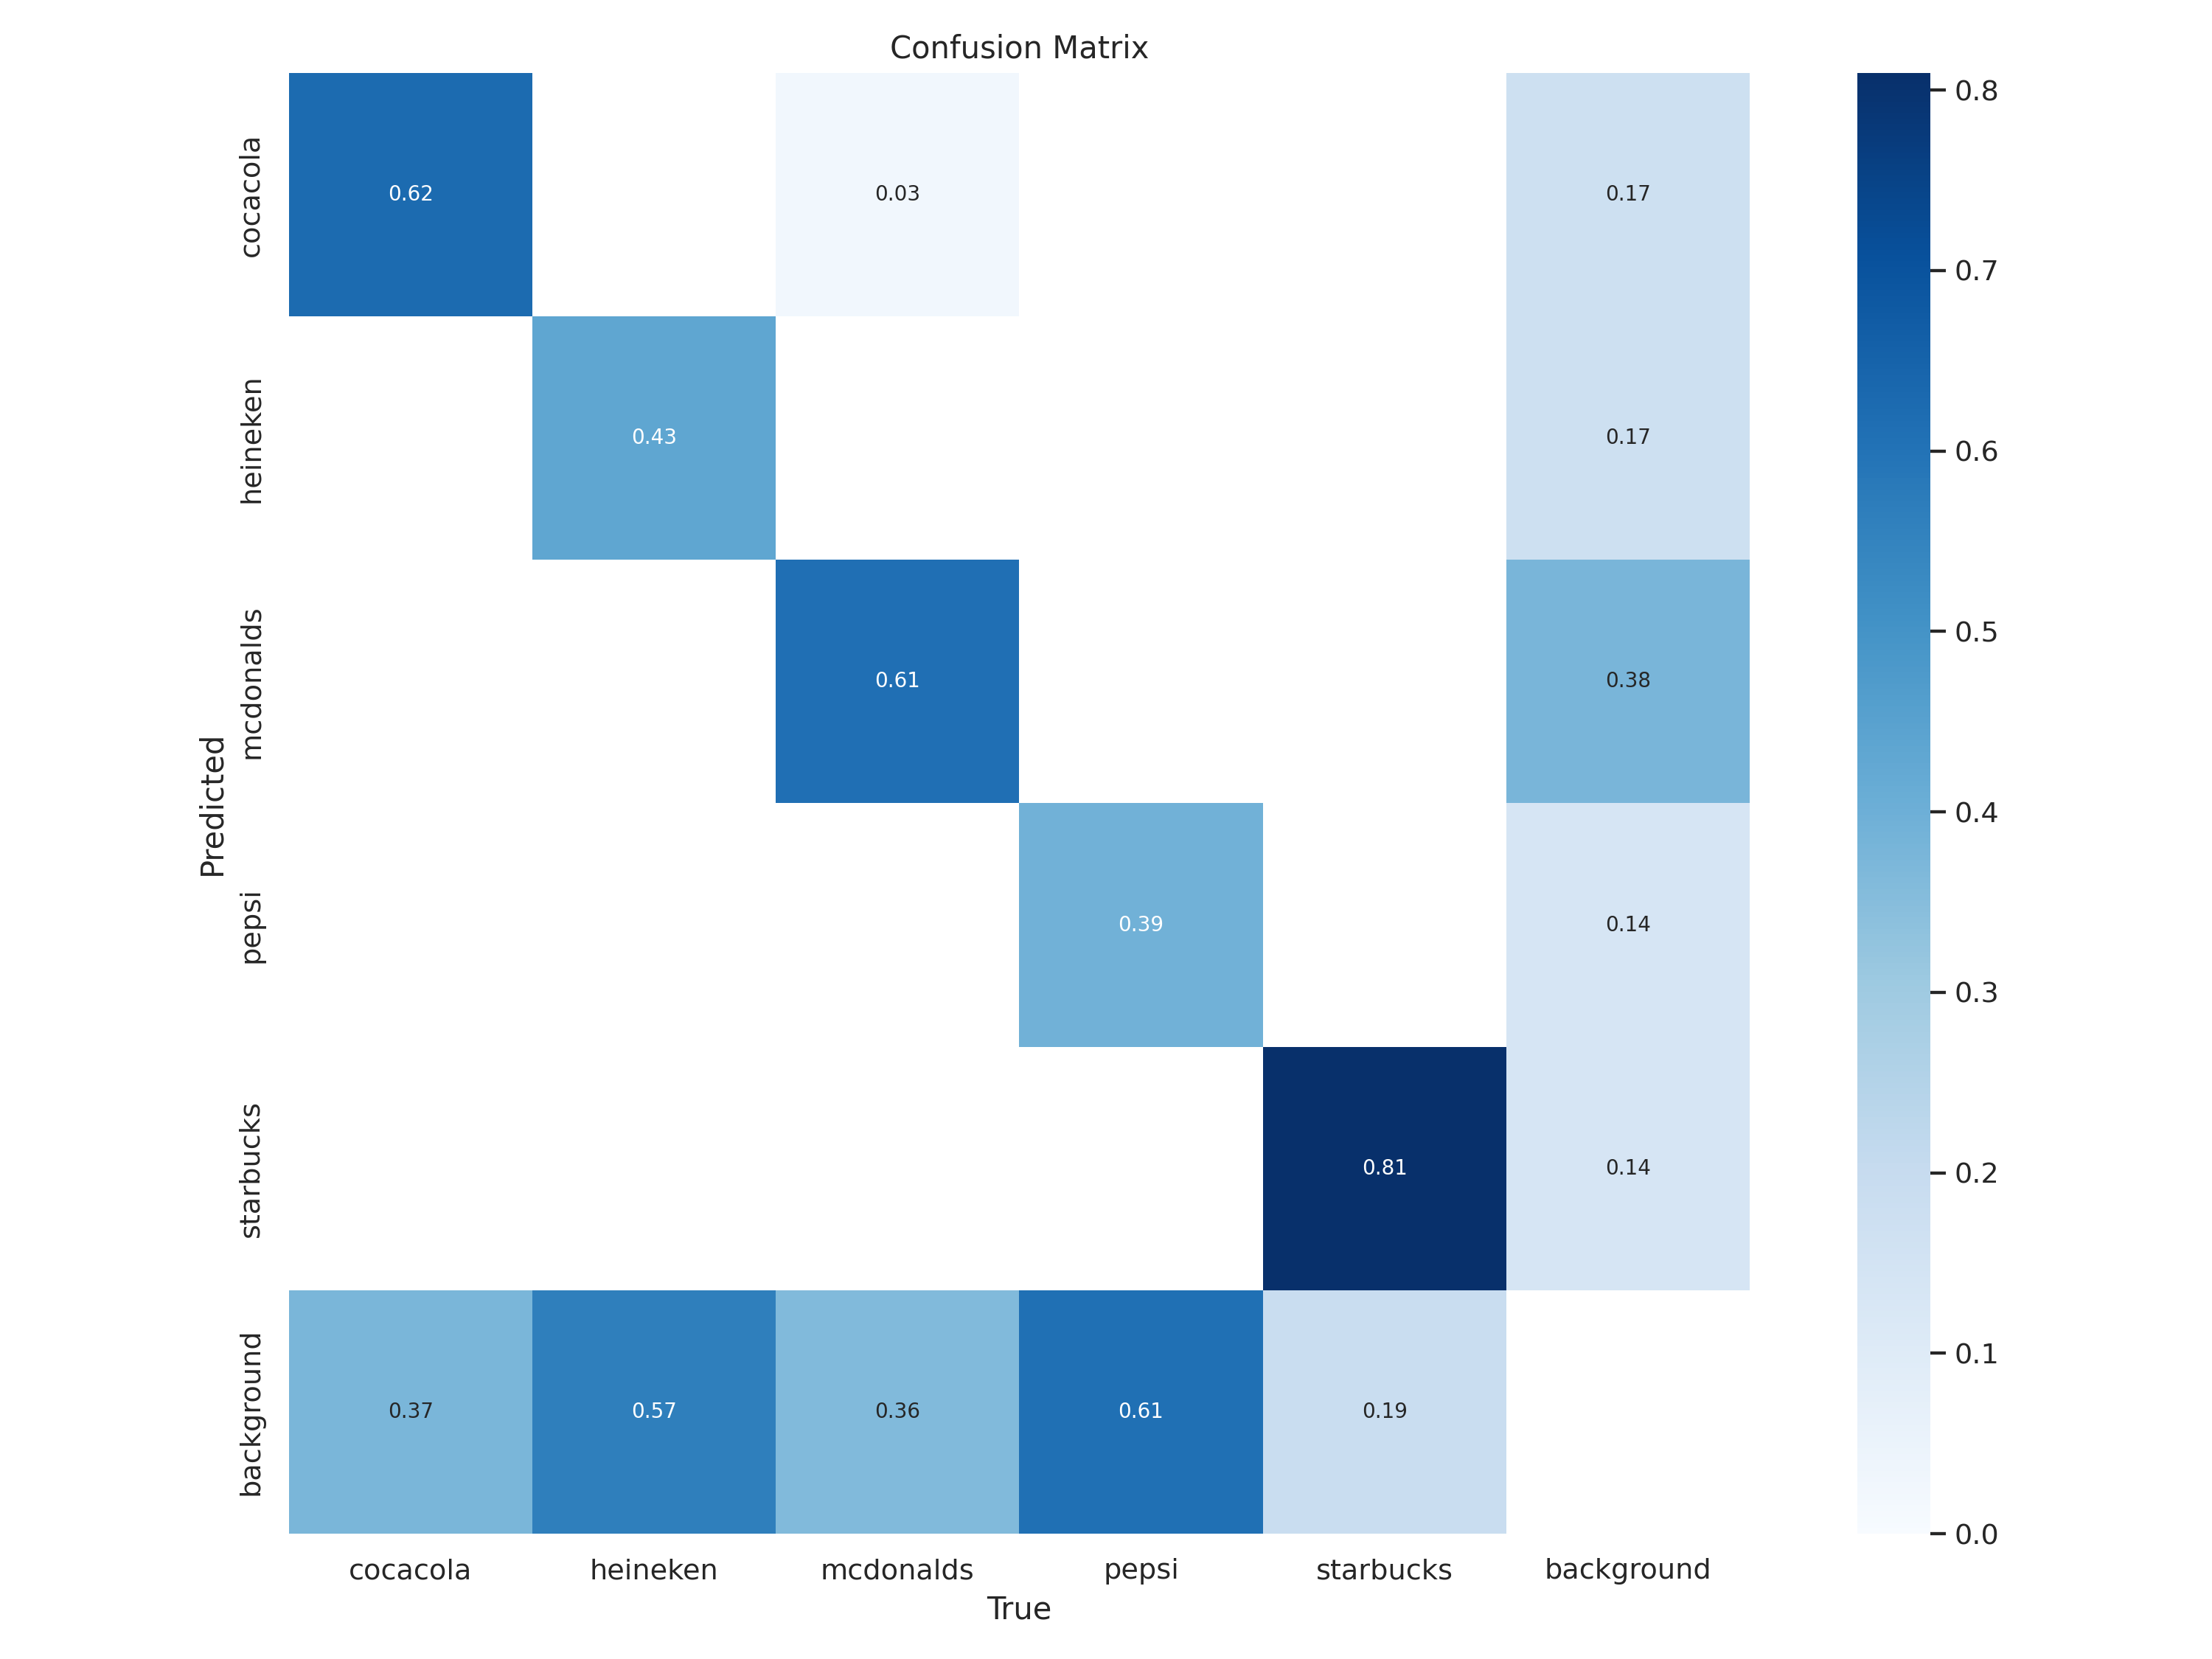

In [9]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

Resultados en base a metricas

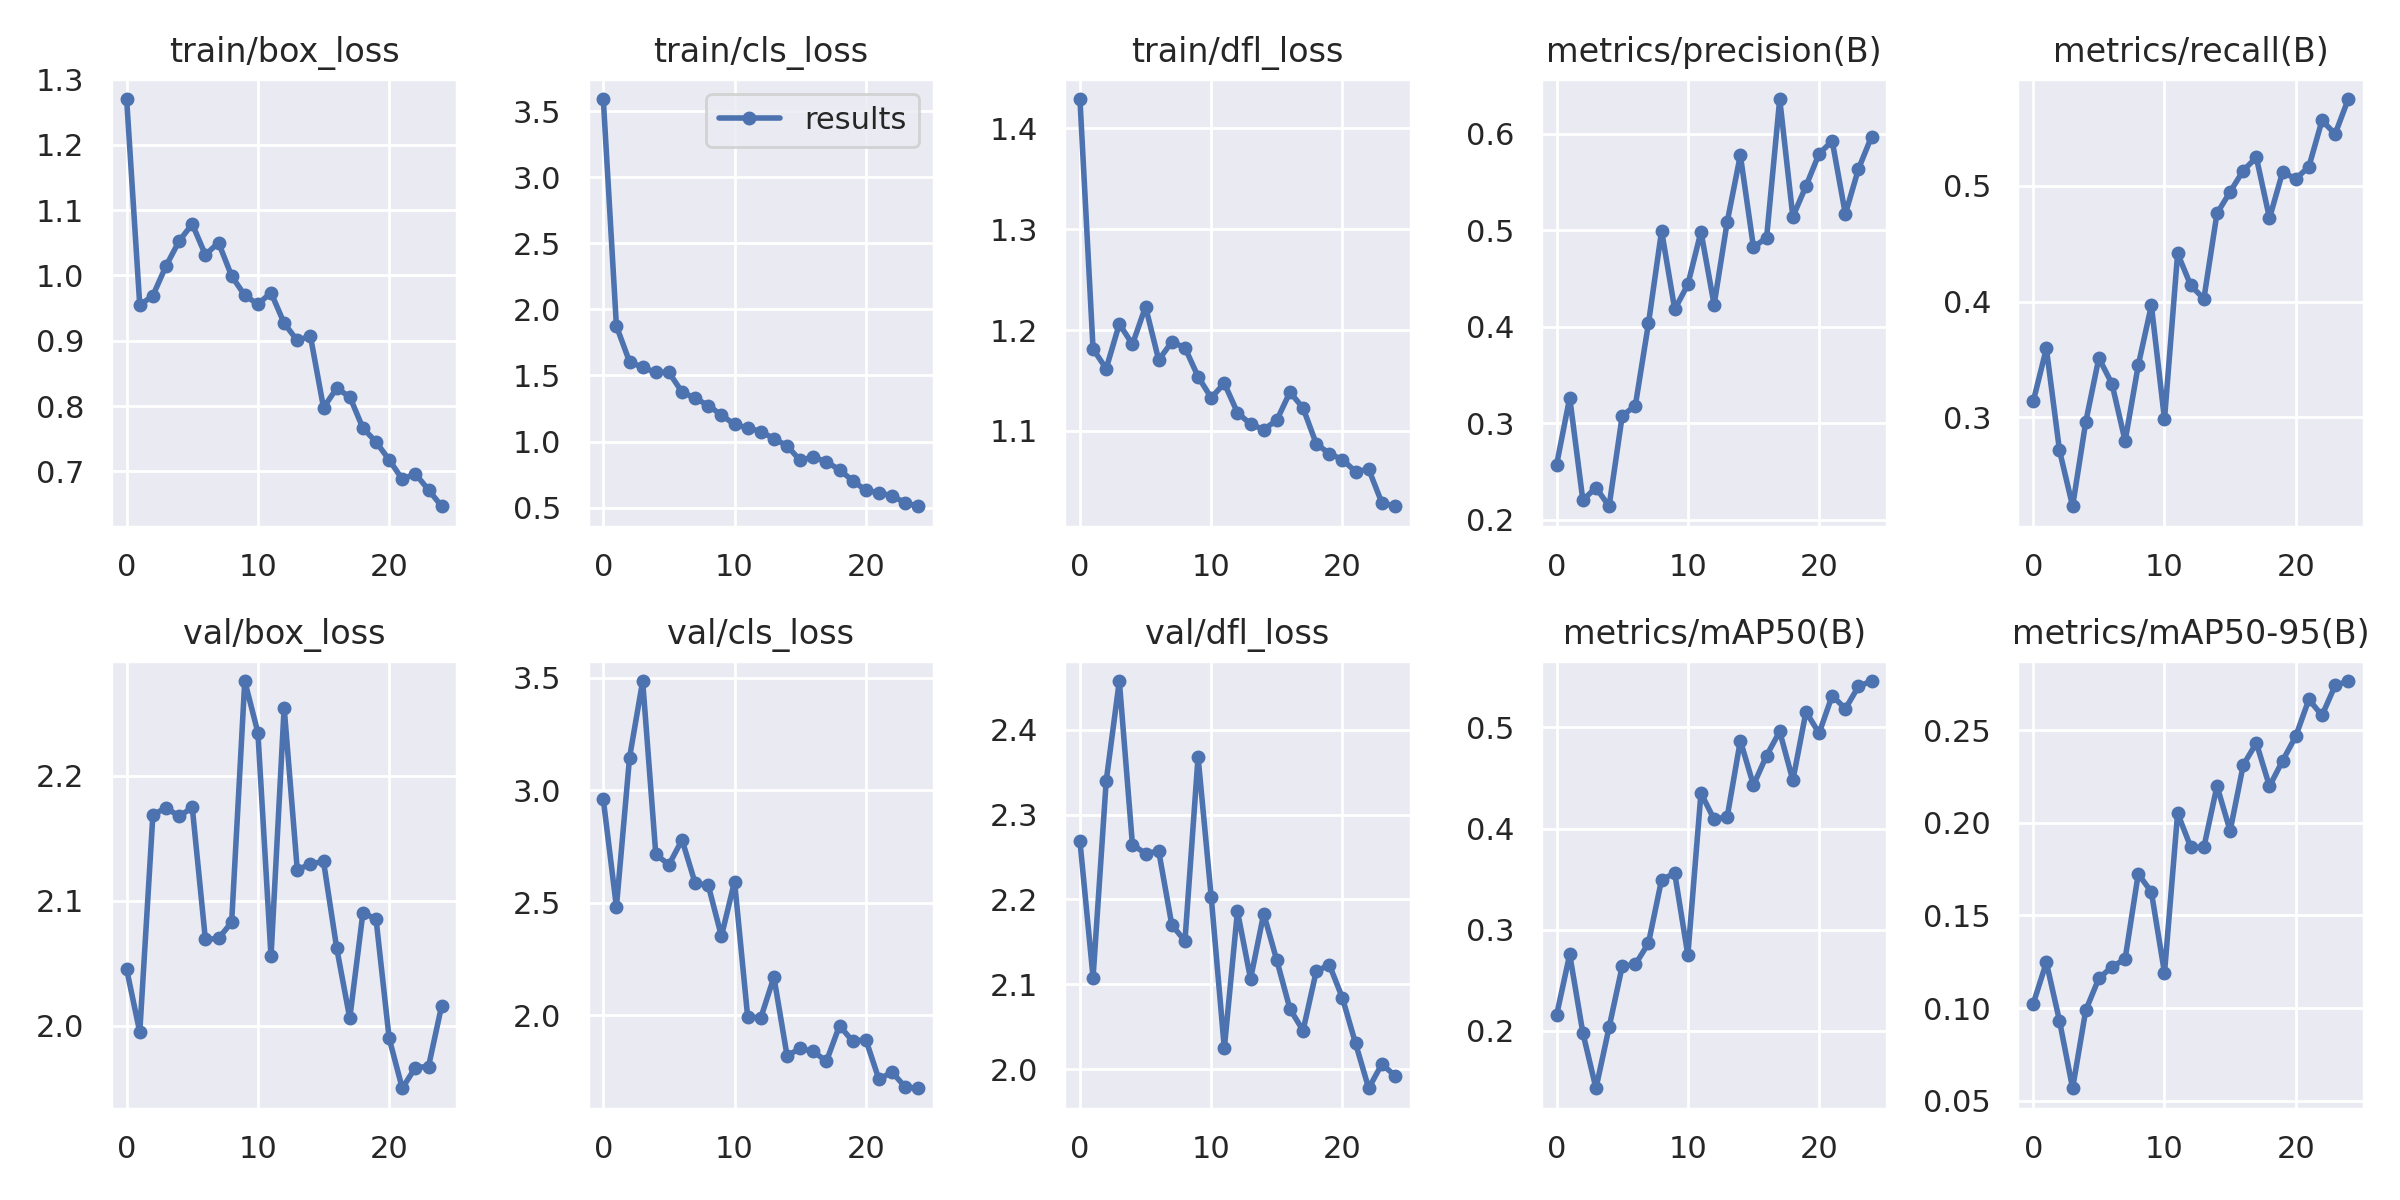

In [10]:
Image(filename='runs/detect/train/results.png', width=600)

Predicciones en base a imagenes de validacion

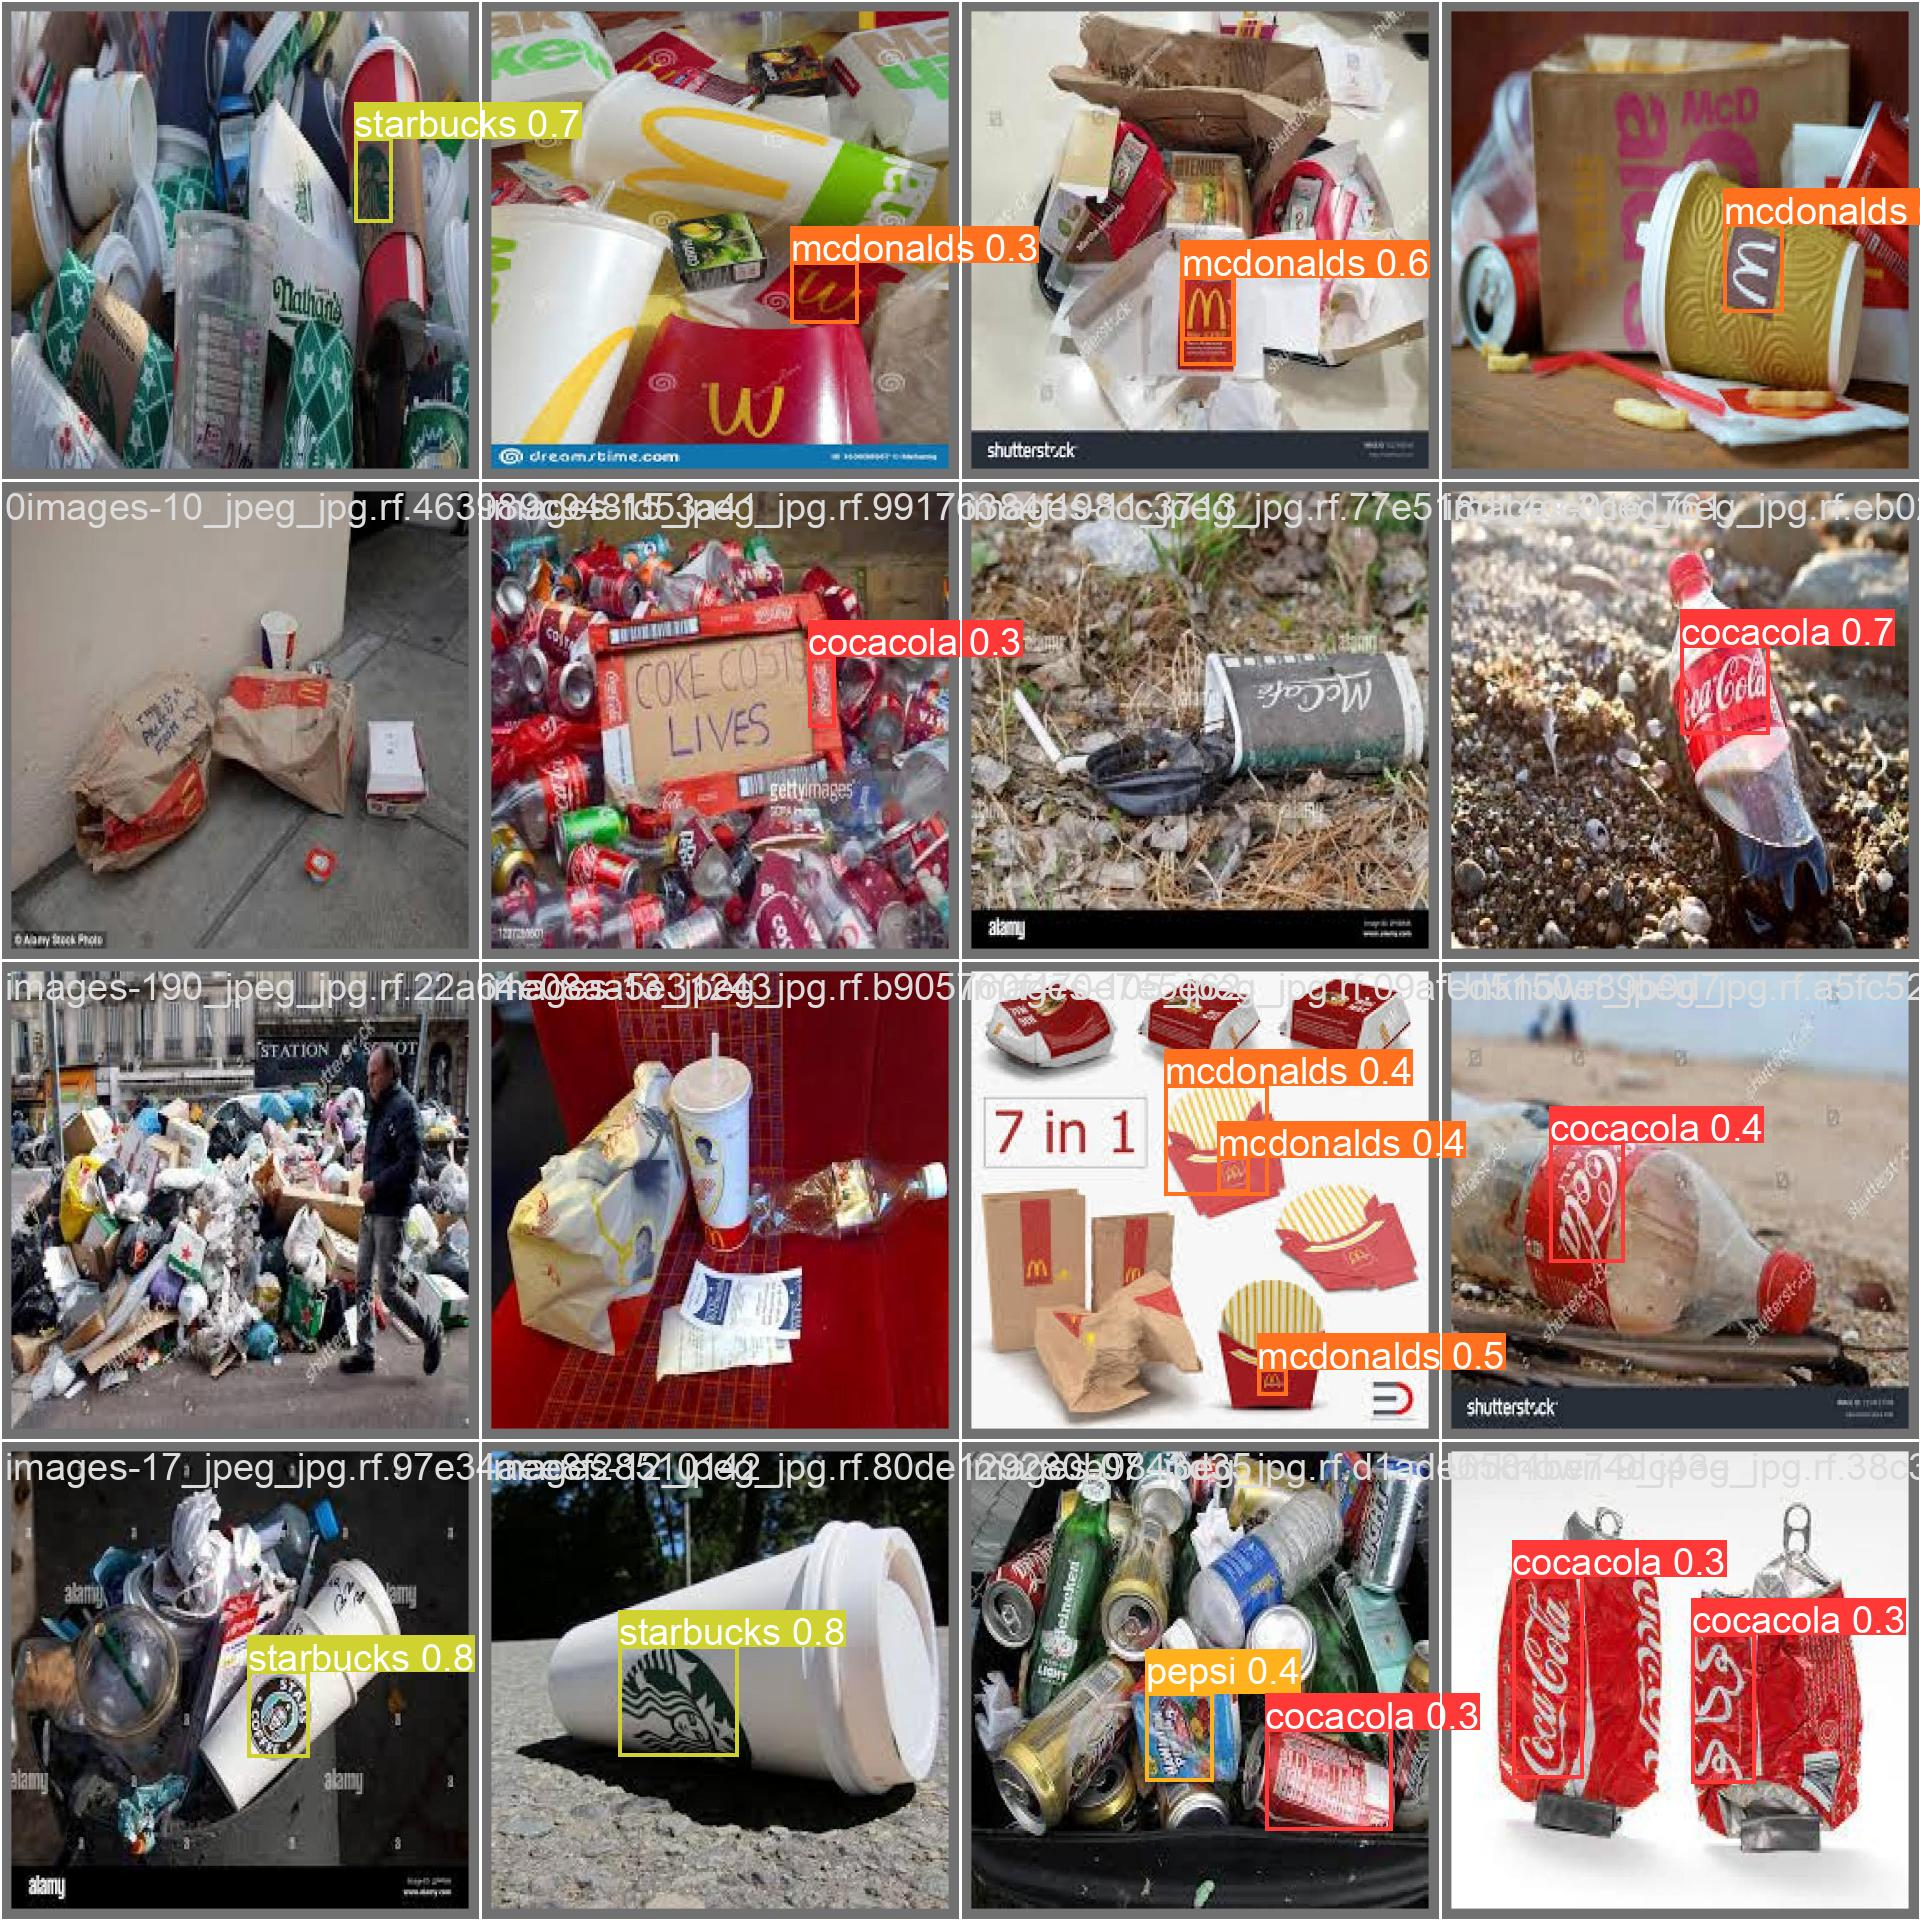

In [11]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

# Validacion de dataset

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-02 19:47:12.986959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 19:47:12.987021: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 19:47:12.987064: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 19:47:15.163294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/brandsDetection-4/valid/label

# Exportar datos

Exportar datos a google drive o hacer un zip para descargar desde archivos en google colab

In [13]:
#Copiar los resultados desde colab a una carpeta en Google Drive

#!scp -r /content/runs '/content/gdrive/My Drive/yolov8'

In [14]:
#Comprimir resultados a zip para descargar desde colab
#!zip -r /content/runs.zip /content/runs/

# Prediccion video con google drive

In [15]:
#!yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source= '/content/gdrive/My Drive/yolov8/coca-cola-vs-pepsi.mp4'

In [16]:
#!ffmpeg -i {"/content/runs/detect/predict/coca-cola-vs-pepsi.avi"} -vcodec libx264 {"prediccion.mp4"}

# Subir un archivo video o imagen para analizar con el modelo

Admite formato de video mp4 y en formato de imagen jpg, jpeg, png

El video se guarda como prediccion.mp4 en la raiz del directorio y la imagen se puede ver de manera automatica, ambos se guardan en runs/detect/predictx donde x es la cantidad de veces que se ha corrido el codigo

Marcas que detecta

*   McDonalds
*   Coca-Cola
*   Pepsi
*   Heineken
*   Starbucks

In [35]:
from google.colab import files

# Cargar la imagen desde el dispositivo local
carga = files.upload()

# Obtener la lista de archivos cargados
nombre_archivo = list(carga.keys())

# Mostrar el nombre del archivo cargado
print("Nombre del archivo cargado:", nombre_archivo[0])

# Obtener la ruta del archivo cargado
ruta_archivo = '/content/' + nombre_archivo[0]

# Mostrar la ruta del archivo
print("Ruta del archivo cargado:", ruta_archivo)


Saving 1afa5aa0dde8397014edeea7799cb799_640x640.jpg to 1afa5aa0dde8397014edeea7799cb799_640x640.jpg
Nombre del archivo cargado: 1afa5aa0dde8397014edeea7799cb799_640x640.jpg
Ruta del archivo cargado: /content/1afa5aa0dde8397014edeea7799cb799_640x640.jpg


2023-12-02 20:09:49.995942: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 20:09:49.996010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 20:09:49.996050: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 20:09:51.171632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/1afa5aa0dde8397014edeea7799cb799_640x640.jpg: 640x6

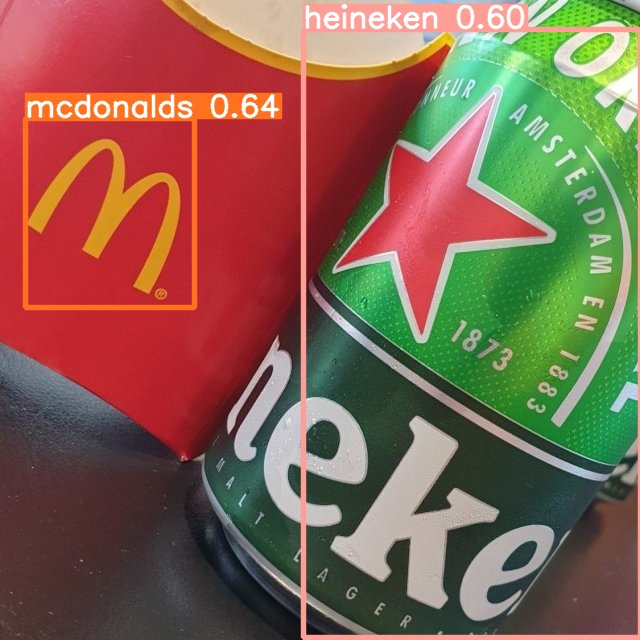

In [36]:
import os
from IPython.display import Image, display

#Nombres de archivo
extension_archivo = ruta_archivo.split('.')[-1]
archivo_a_mostrar = nombre_archivo[0]
nombre_archivo_sin_extension = nombre_archivo[0].rsplit('.', 1)[0]

# Directorio base
directorio_base = '/content/runs/detect/'

# Encuentra el último número de carpeta creado
ultimo_numero = 0
carpetas_predict = [carpeta for carpeta in os.listdir(directorio_base) if carpeta.startswith('predict') and carpeta[7:].isdigit()]
if carpetas_predict:
    ultimo_numero = max(int(carpeta[7:]) for carpeta in carpetas_predict)

# Incrementar el número para la próxima carpeta
nuevo_numero = ultimo_numero + 1

# Construir la parte final de la ruta
if nuevo_numero == 1:
  parte_final_ruta = f'predict/'
elif nuevo_numero != 1:
  parte_final_ruta = f'predict{nuevo_numero}/'

# Construir la ruta completa del archivo
ruta_completa_imagen = f'{directorio_base}{parte_final_ruta}{archivo_a_mostrar}'

# Construye la ruta completa del archivo
ruta_completa_video = f'{directorio_base}{parte_final_ruta}{nombre_archivo_sin_extension}.mp4'

#Dependiendo del formato de archivo generar una prediccion con el modelo entrenado
if extension_archivo.lower() == 'mp4':
  !yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source= {ruta_archivo} save=True
  !ffmpeg -i {ruta_completa_video} -vcodec libx264 {"prediccion.mp4"}
  print("\n El archivo de video con predicciones esta en la raiz del directorio de google colab")
elif extension_archivo.lower() == 'jpg' or extension_archivo.lower() == 'png' or extension_archivo.lower() == 'jpeg':
  !yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.5 source= {ruta_archivo} save=True
  display(Image(filename=ruta_completa_imagen, width=600))
else:
    print("El archivo no es un video con extensión MP4, AVI, PNG o JPG.")